# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

1. Load Data

In [19]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/gdrive/MyDrive/kaggle/creditcardfraud/creditcard.csv")
# Displaying
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


2. Check Missing Values ( If Exist ; Fill each record with mean of its feature )

In [31]:
# Checking NaN Values
for column in data.columns:
  print(column, np.isnan(data[column]).sum())
# So there is no NaN value

Time 0
V1 0
V2 0
V3 0
V4 0
V5 0
V6 0
V7 0
V8 0
V9 0
V10 0
V11 0
V12 0
V13 0
V14 0
V15 0
V16 0
V17 0
V18 0
V19 0
V20 0
V21 0
V22 0
V23 0
V24 0
V25 0
V26 0
V27 0
V28 0
Amount 0
Class 0


3. Standardized the Input Variables. 

In [50]:
x = data.loc[:, 'V1':'V28'] # Input
y = data['Class'] # Output

4. Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

In [58]:
length = len(x)

# 50% Training
x_train = x.loc[0: length/2]
y_train = y.loc[0: length/2]

# 30% Test
x_test = x.loc[length/2 + 1: 4/5*length]
y_test = y.loc[length/2 +1: 4/5*length]

# 20% Validation
x_validate = x.loc[4/5*length + 1:]
y_validate = y.loc[4/5*length + 1:]

# Checking
print(len(x_train)/length, len(x_test)/length, len(x_validate)/length)

0.5000017555748278 0.2999961377353787 0.19999508439048197


5. Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

In [59]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(28, activation='relu', input_shape=(28, ))) # Input Layer
model.add(layers.Dense(10, activation='relu')) # Hidden Layer 1
model.add(layers.Dense(8, activation='relu')) # Hidden Layer 2
model.add(layers.Dense(6, activation='relu')) # Hidden Layer 3
model.add(layers.Dense(1, activation='sigmoid')) # Output Layer

6. Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

In [60]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

7. Train the Model with Epochs (100).

In [62]:
history = model.fit(x_train, y_train, epochs=100, batch_size=512, validation_data=(x_validate, y_validate))

Epoch 1/100
279/279 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0220 - val_accuracy: 0.9949
Epoch 2/100
279/279 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0215 - val_accuracy: 0.9949
Epoch 3/100
279/279 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0210 - val_accuracy: 0.9957
Epoch 4/100
279/279 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0217 - val_accuracy: 0.9949
Epoch 5/100
279/279 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0256 - val_accuracy: 0.9941
Epoch 6/100
279/279 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0269 - val_accuracy: 0.9938
Epoch 7/100
279/279 [==============================] - 1s 2ms/step - loss: 9.6348e-04 - accuracy: 0.9998 - val_loss: 0.0255 - val_accuracy: 0.

8. If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

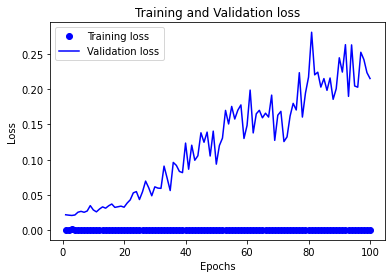

In [63]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # bo is for blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # b is for solid blue line
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [68]:
# Changing the layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(28, ))) # Input Layer
model.add(layers.Dense(8, activation='relu')) # Hidden Layer 3
model.add(layers.Dense(1, activation='sigmoid')) # Output Layer
# Complilatin
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# Epochs 4(after experiment)
history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_validate, y_validate))

Epoch 1/4
279/279 [==============================] - 1s 2ms/step - loss: 0.2308 - accuracy: 0.9799 - val_loss: 0.0139 - val_accuracy: 0.9987
Epoch 2/4
279/279 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.0088 - val_accuracy: 0.9987
Epoch 3/4
279/279 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9983 - val_loss: 0.0081 - val_accuracy: 0.9995
Epoch 4/4
279/279 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0068 - val_accuracy: 0.9995


9. Prediction should be > 92%

10. Evaluation Step

In [71]:
model.evaluate(x_test, y_test) # 99% Accuracy

2671/2671 [==============================] - 2s 840us/step - loss: 0.0071 - accuracy: 0.9994


[0.007110022474080324, 0.9994148015975952]